In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

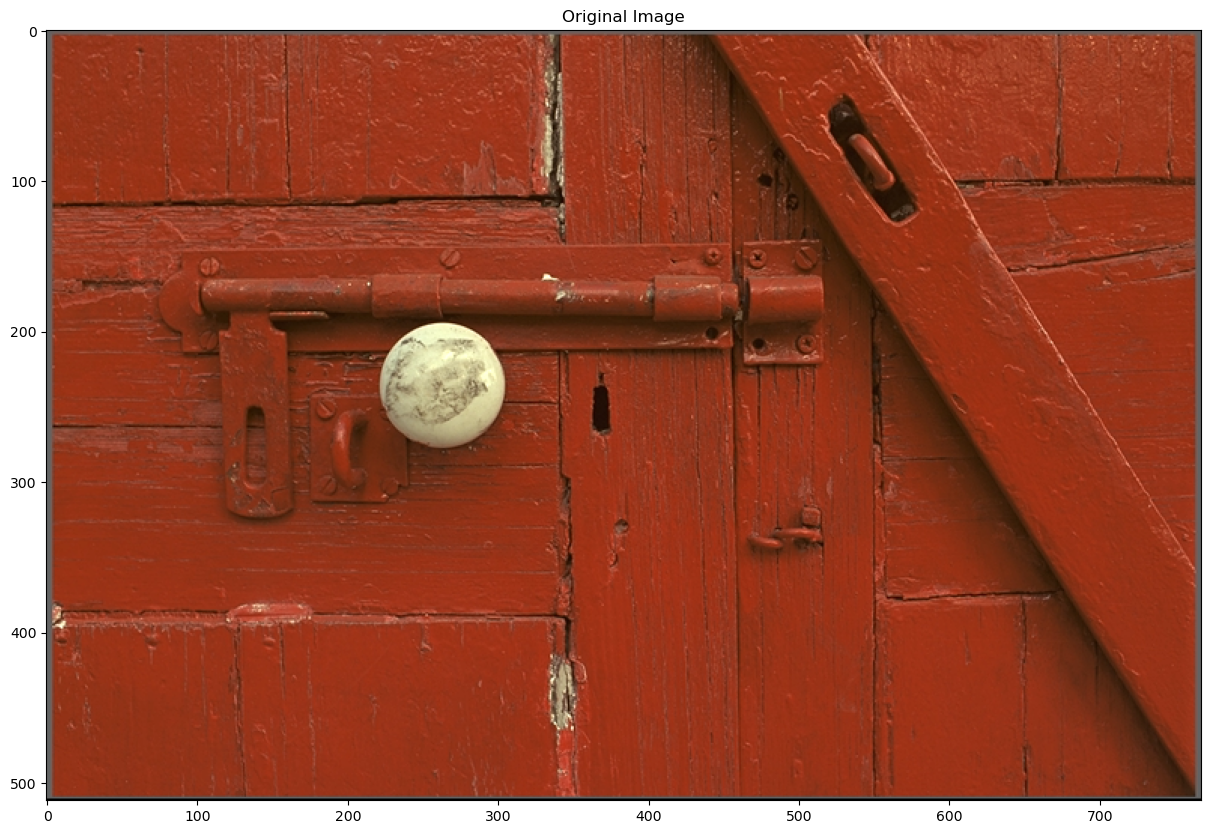

In [11]:
# Load image
img = cv2.imread('kodim02.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)
plt.title('Original Image')
plt.show()

In [12]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

In [13]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the palette (using Euclidean distance)
        distances = np.linalg.norm(colors - pixel, axis=1)
        new_pixel = colors[np.argmin(distances)]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

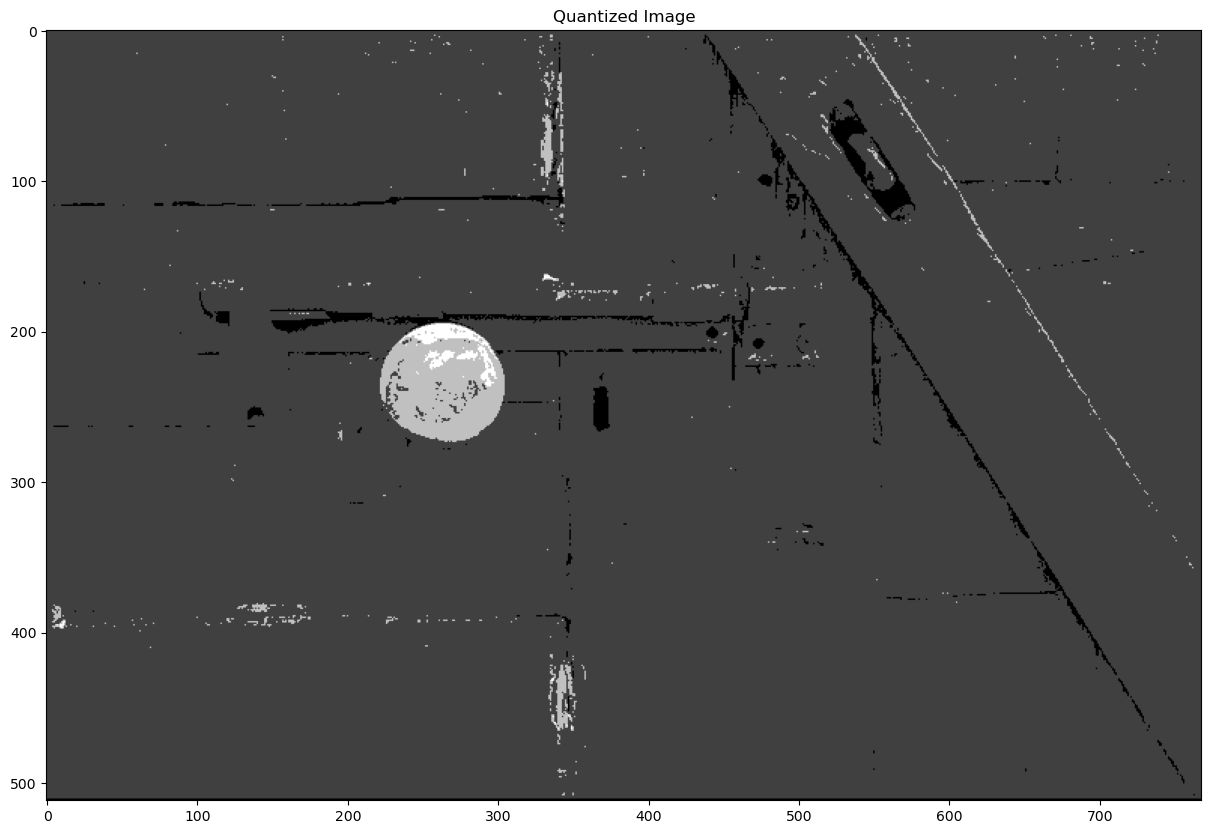

In [14]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))
plt.title('Quantized Image')
plt.show()

In [15]:
# Compute average quantization error
quant_error = np.abs(img - quantized)
avg_quant_error = np.mean(quant_error)
print(f'Average Quantization Error: {avg_quant_error}')

Average Quantization Error: 42.38778093126085


In [16]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c]
        
        # Find the closest colour from the palette (using Euclidean distance)
        distances = np.linalg.norm(colors - pixel, axis=1)
        new_pixel = colors[np.argmin(distances)]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Apply dithering
        dithering[r, c, :] = new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        img_tmp[r, c+1] += quant_error * 7/16
        img_tmp[r+1, c-1] += quant_error * 3/16
        img_tmp[r+1, c] += quant_error * 5/16
        img_tmp[r+1, c+1] += quant_error * 1/16

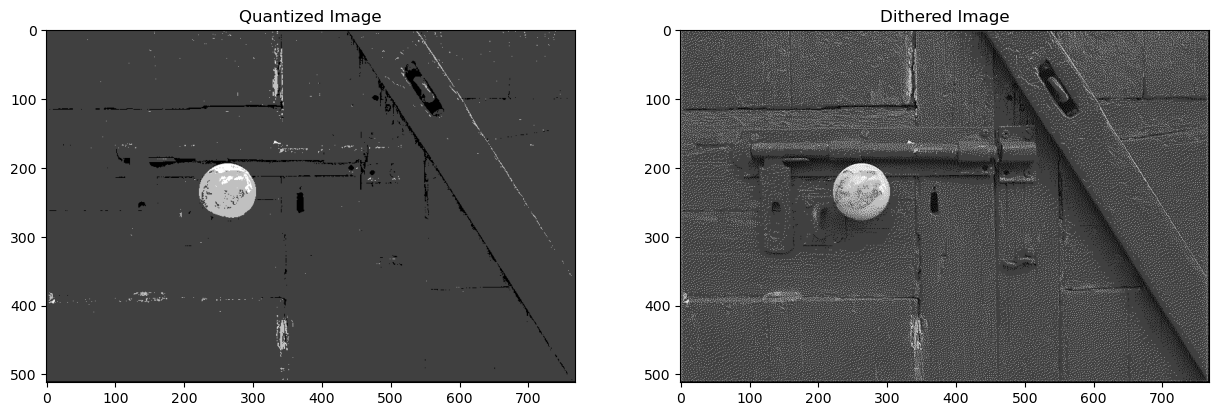

In [17]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8)), plt.title('Quantized Image')
plt.subplot(122), plt.imshow(dithering.astype(np.uint8)), plt.title('Dithered Image')
plt.show()

In [18]:
# Compute average quantization error for dithered image
dith_error = np.abs(img - dithering)
avg_dith_error = np.mean(dith_error)
print(f'Average Dithering Error: {avg_dith_error}')

Average Dithering Error: 48.96147579616971
